1880


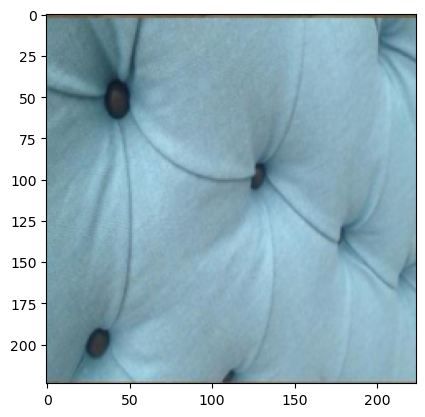

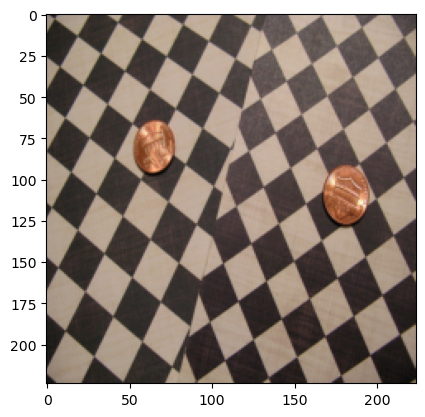

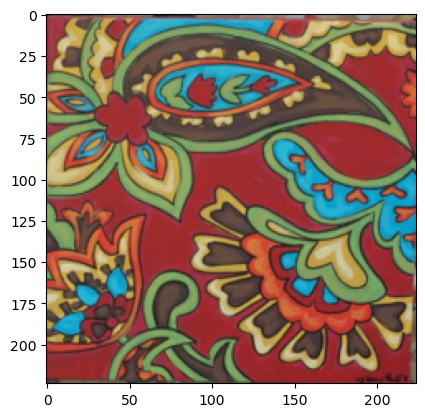

In [1]:
"""
 @Time    : 2023-03-21 07:29:40
 @Author  : Hong-Shuo Chen
 @E-mail  : hongshuo@usc.edu
 
 @Project : Camouflage Object Detection
 @File    : color_texture_decomposition.py
 @Function: Color Textrue Decomposition
"""
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

train_data = torchvision.datasets.DTD(root='./data', download=True, transform=transform)
print(len(train_data))

train_data_loader = torch.utils.data.DataLoader(train_data,
                                          batch_size=16,
                                          shuffle=True)
images, labels = next(iter(train_data_loader))
for i in range(3):
    plt.imshow(images[i].permute(1,2,0))
    plt.show()


tensor([0.7671, 0.1529, 0.0800])


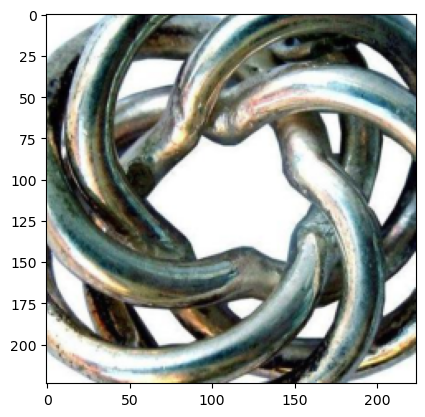

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


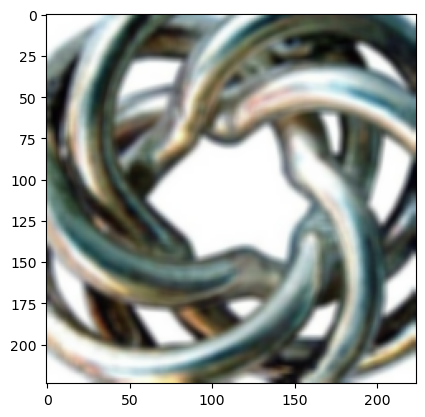

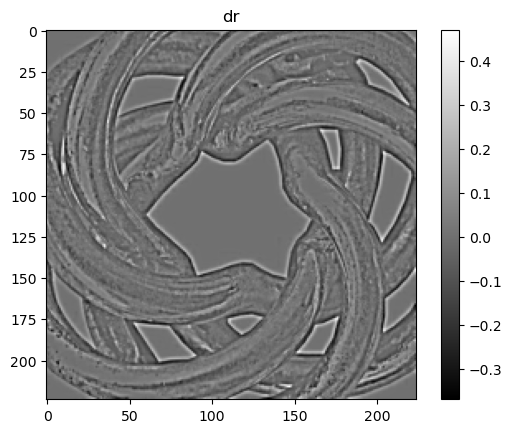

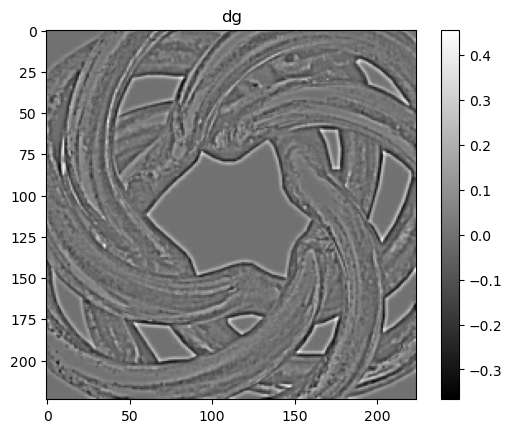

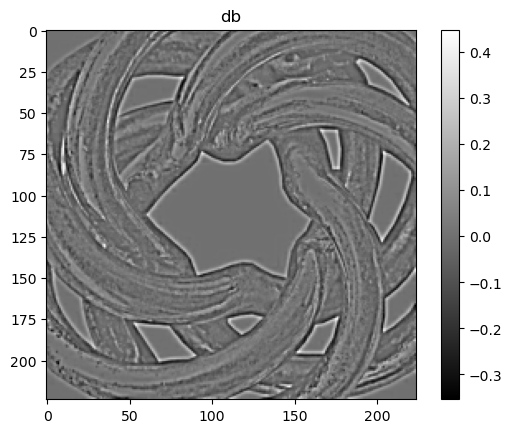

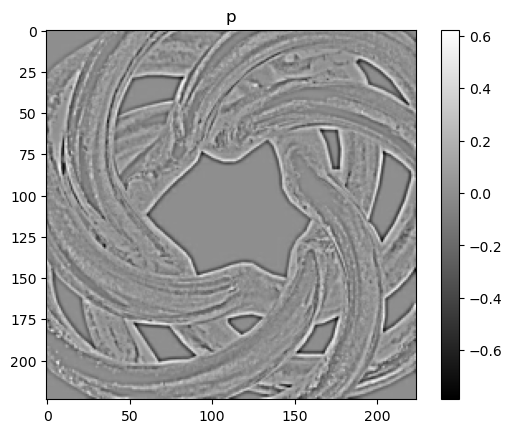

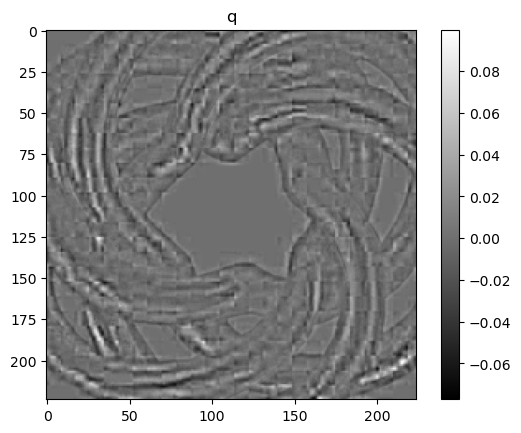

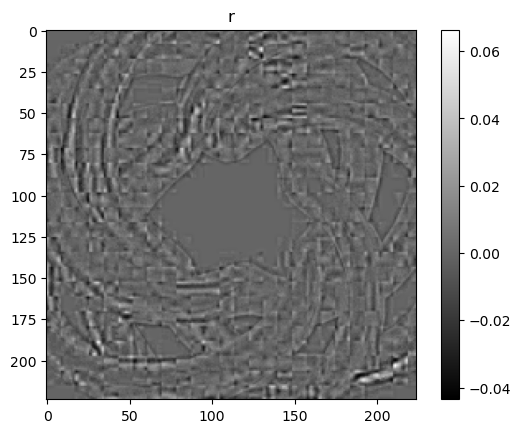

In [2]:
from color_texture_decomposition import Color_Texture_Decomposition, Color_Texture_Hop, Multiscale_Color_Texture_Hop
# training
CTD = Color_Texture_Decomposition(average_size=5, mode="average").train()
with torch.no_grad():
    mean, delta, pqr = CTD(images)

# inference
CTD.eval()
images, labels = next(iter(train_data_loader))
with torch.no_grad():
    mean, delta, pqr = CTD(images)

print(CTD.pca.explained_variance_ratio_)

for i in range(1):
    plt.imshow(images[i].permute(1,2,0))
    plt.show()
    plt.imshow(mean[i].permute(1,2,0))
    plt.show()
    names = ['dr', 'dg', 'db']
    for j in range(3):
        plt.imshow(delta[i,j], cmap='gray')
        plt.colorbar()
        plt.title(names[j])
        plt.show()
    names = ['p', 'q', 'r']
    for j in range(3):
        plt.imshow(pqr[i,j], cmap='gray')
        plt.colorbar()
        plt.title(names[j])
        plt.show()

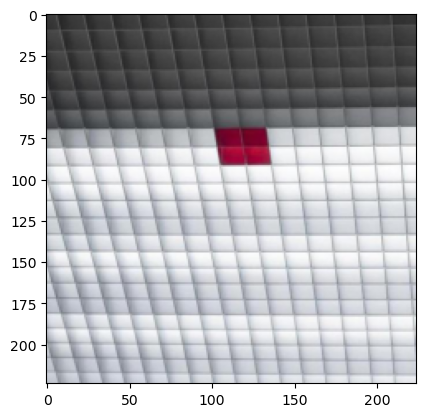

torch.Size([16, 78, 224, 224])


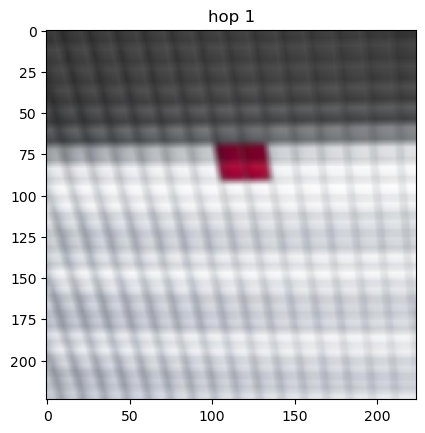

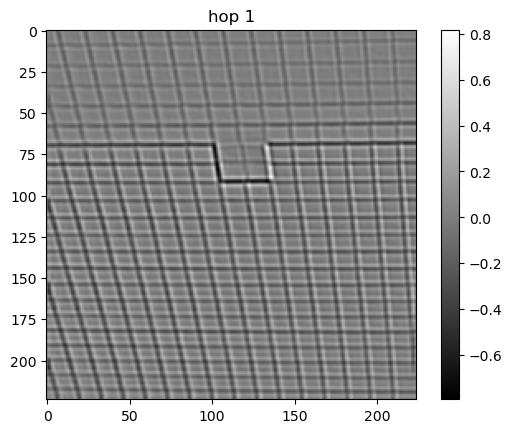

torch.Size([16, 78, 224, 224])


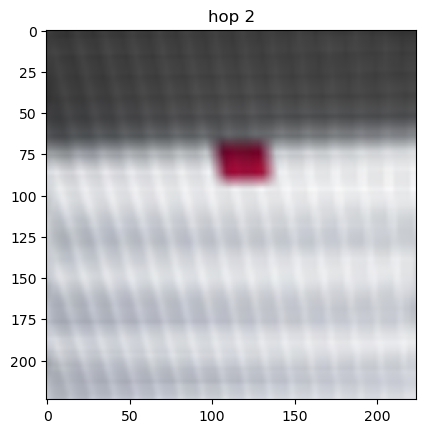

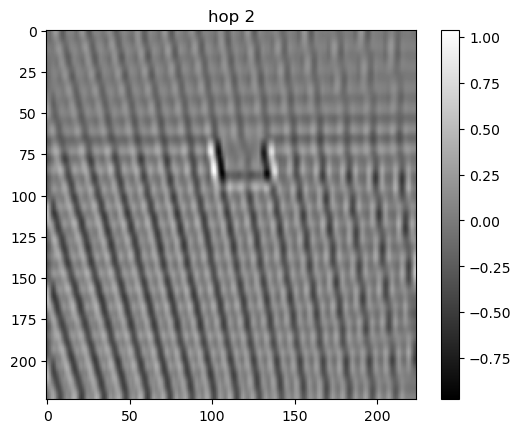

torch.Size([16, 78, 224, 224])


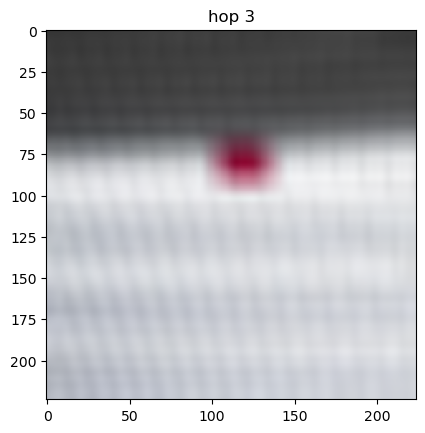

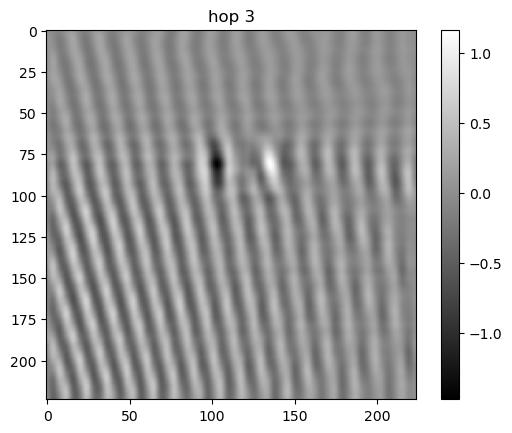

torch.Size([16, 78, 224, 224])


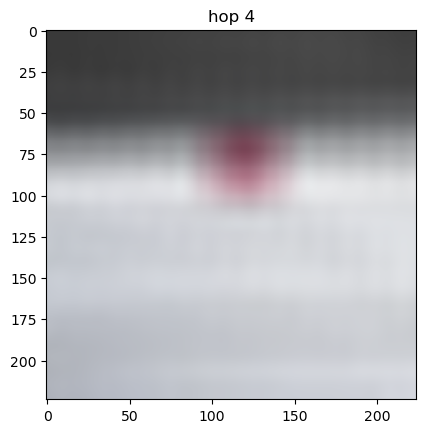

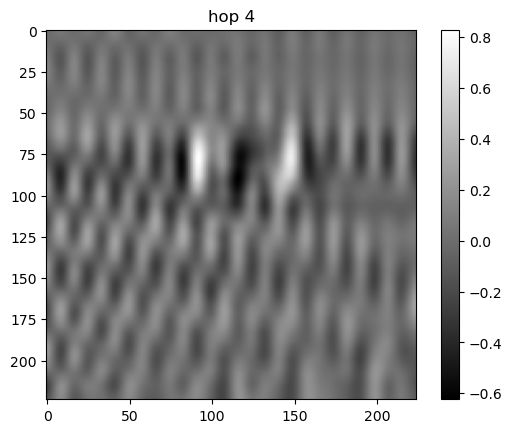

In [4]:
# training
MSCTHop = Multiscale_Color_Texture_Hop(kernel_size=5, average_size=5, sigma=1, num_hops=4,
                                       output_size=(224,224), interpolation_mode='bicubic', align_corners=True).train()
with torch.no_grad():
    output = MSCTHop(images)

# inference
MSCTHop.eval()
images, labels = next(iter(train_data_loader))
with torch.no_grad():
    output = MSCTHop(images)

for i in range(1):
    plt.imshow(images[i].permute(1,2,0))
    plt.show()
    for k in range(4):
        print(output[k].shape)
        plt.imshow(output[k][i,0:3].permute(1,2,0))
        plt.title("hop " + str(k+1))
        plt.show()
        plt.imshow(output[k][i,4], cmap='gray')
        plt.colorbar()
        plt.title("hop " + str(k+1))
        plt.show()